> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project:TMDb movie data
`
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 


In this project we will discuss about 10000 movies that prvide from TMDb and in particular we are interested in that  movies make more money and the movies that have a higher number of revenue and what movies that have highr budget also we interested on comedys movies.




In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


In [3]:
# Now we load the data and check some rows from the dataset to identify the questions:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
# we will identfy each col we have 20 columns 

# id: It is the order of the number of films from 1 to 10,000, which is a unique number 
#  imdb_id : wich is the id of the film and its a unique number
# popularity : A measure of the popularity of the movie
# budget : movie budget
# revenue: The revenue or profit earned by the film
# original_title: Movie title(name)
# Cast: The cast who performed in this movie
# homepage: Homepage link to visit the movie site
# director: The director who oversaw the operation of the film
# Tagline: catchy slogan that is printed on posters
# overview: Description of the film's content
# Runtime: the duration of a motion picture, a theatrical performance, or a recording (IN MINUTE)
# genres:  stylistic categories where a particular movie can be placed based on the setting, characters, plot, mood, tone, and theme
# production_companies: a studio that creates works in the fields of performing film
# release_date: Film release date
# vote_count: number of people who rate the movie
# vote_avgerage: IMDb registered users can cast a vote (from 1 to 10) on every released title in the database
# release_year: Film release date by year
# budget_adj:  all costs relating to the development, production, and post-production of a film
# revenue_adj: the film's revenue


>**after see the taple we have some question here:**

    1- Which movie had the highest and lowest benefits?
    2- Which movie had the highest and lowest budget?
    3- Which movie had the highest and lowest revenue?
    4- Which movie had the highest and least runtime?

>**question that dependet:**
    
    1- What is the average budget of the movie benefits of movies that genres is Comedy?
    2- What is the average revenue of the movie benefits of movies that genres is Comedy?
    3- What is the average budget of the movieWhat is the average runtime of the movie benefits of movies that genres is Comedy
    4- What is the classification of comedy films among all types of films?

<a id='wrangling'></a>
## Data Wrangling

> **: In this section of the report, i will load the the data and i will check for cleanliness, and then trim and clean the dataset for analysis. Make sure that you.**

## NOTE:

   > **: We have noted in the previous table that he did not specify the currency used, so we will consider the currency used to be in dollars.**


### General Properties
 ok now we will check the data if required for clean.

In [5]:
#Examining data types and looking for suspicious objects
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [6]:
#statistics of the data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
# we will see the datatypes of columns and missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [8]:
# number of duplicated rows.
sum(df.duplicated())

1

In [9]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10861    False
10862    False
10863    False
10864    False
10865    False
Length: 10866, dtype: bool


### Data Cleaning
   > **Cleaning that needs to be performed after see the pre-data:**
 1-  remove columns that we dont need it.
 2- delete the duplicated row.
 3- There are movies where the budget or revenue have a value=0, we need to discard this rows.
 4- Transformation the budget and revenue column to ((int)) datatype.
 5- Replace runtime value of 0 to none, Because we don't want to affect our results.
 6- we will change the (release_date) column into right date format.
 

### ok let this step and solve it step by step

1- remove columns that we dont need it.

In [10]:
# Columns that needs to be deleted
delete_the_columns = [ 'id', 'imdb_id', 'popularity',
                   'homepage', 'director', 'tagline', 'overview', 'production_companies', 
                   'vote_count', 'vote_average','revenue_adj','budget_adj','keywords']
# Drop the columns from the database
df.drop(delete_the_columns, axis=1, inplace=True)

df.head()


,budget,revenue,original_title,cast,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,4/1/15,2015


In [11]:
#show the number of entries in our data after our modifing
row, columns = df.shape
print(columns, row-1)

8 10865


so we have 8 columns and 10865 rows

2- delete the duplicated row.

In [12]:
# delete the duplicates rows and keep the first 
df.drop_duplicates(keep = 'first', inplace = True)
# Store rows and columns 
row, columns = df.shape
print(columns, row-1)

8 10864


now we have 10864 rows and 8 columns.

3-There are movies where the budget or revenue have a value=0, we need to discard this rows.

In [13]:
#column that need to be check.
columns = ['budget', 'revenue']
#change 0 to none
df[columns] = df[columns].replace(0, np.NaN)
# drop rows which contains none
df.dropna(subset = columns, inplace = True)
row, col = df.shape
print(row-1)

3853


now we have (3853)

 >4- Transformation the budget and revenue column to ((int)) datatype
 
 >5- change runtime value (0) to none, Because we don't want to affect our results. 
 
 >6- we will change the (release_date) column into right date format

In [14]:
# Columns to Transformation datatype 
columns = ['budget','revenue']
# Transformation revenue and budget column to (int) datatype
df[columns] = df[columns].applymap(np.int64)

# Transformation column release_date to DateTime
df.release_date = pd.to_datetime(df['release_date'])

# change runtime value of 0 to none, Because we don't want to affect our results.
df['runtime'] = df['runtime'].replace(0, np.NaN)
# Check the stats of dataset
df.describe()

# show the new datatype
df.dtypes

budget                     int64
revenue                    int64
original_title            object
cast                      object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

In [15]:
# Let show the new data
df.head()

,budget,revenue,original_title,cast,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,2015-04-01,2015


In [16]:
# Let show the new data

df.describe()

,budget,revenue,runtime,release_year
count,3.854000e+03,3.854000e+03,3854.000000,3854.000000
mean,3.720370e+07,1.076866e+08,109.220291,2001.261028
std,4.220822e+07,1.765393e+08,19.922820,11.282575
min,1.000000e+00,2.000000e+00,15.000000,1960.000000
25%,1.000000e+07,1.360003e+07,95.000000,1995.000000
50%,2.400000e+07,4.480000e+07,106.000000,2004.000000
75%,5.000000e+07,1.242125e+08,119.000000,2010.000000
max,4.250000e+08,2.781506e+09,338.000000,2015.000000


now completed our data Wrangling. :)


<a id='eda'></a>
## Exploratory Data Analysis

>ok here we will **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section.






### Research Question 1 (    1- Which movie had the highest and lowest benefits?)

now we will add a column for benefits in our dataset.

In [17]:
# To calculate benefits, we need to substract the budget from the revenue.
df['benefits'] = df['revenue'] - df['budget']

In [18]:
# show the new data
df.head()

,budget,revenue,original_title,cast,runtime,genres,release_date,release_year,benefits
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,1363528810
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015,228436354
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,2015-03-18,2015,185238201
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015,1868178225
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,2015-04-01,2015,1316249360


In [19]:
# highest benefits
df.loc[df['benefits'].idxmax()]

budget                                                    237000000
revenue                                                  2781505847
original_title                                               Avatar
cast              Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
runtime                                                         162
genres                     Action|Adventure|Fantasy|Science Fiction
release_date                                    2009-12-10 00:00:00
release_year                                                   2009
benefits                                                 2544505847
Name: 1386, dtype: object

In [20]:
# lowest benefits
df.loc[df['benefits'].idxmin()]

budget                                                    425000000
revenue                                                    11087569
original_title                                    The Warrior's Way
cast              Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
runtime                                                         100
genres                    Adventure|Fantasy|Action|Western|Thriller
release_date                                    2010-12-02 00:00:00
release_year                                                   2010
benefits                                                 -413912431
Name: 2244, dtype: object

Which movie had the highest and lowest benefits?

Highest: Avatar with benefits of 2544505847$ 

Lowest: The Warrior's Way with benefits of -413912431$ 

 ### Research Question 1 (    2- Which movie had the highest and lowest budget?)       

In [21]:
#highest budget
df.loc[df['budget'].idxmax()]


budget                                                    425000000
revenue                                                    11087569
original_title                                    The Warrior's Way
cast              Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
runtime                                                         100
genres                    Adventure|Fantasy|Action|Western|Thriller
release_date                                    2010-12-02 00:00:00
release_year                                                   2010
benefits                                                 -413912431
Name: 2244, dtype: object

In [22]:
#lowest budget
df.loc[df['budget'].idxmin()]

budget                                                            1
revenue                                                         100
original_title                                         Lost & Found
cast              David Spade|Sophie Marceau|Ever Carradine|Step...
runtime                                                          95
genres                                               Comedy|Romance
release_date                                    1999-04-23 00:00:00
release_year                                                   1999
benefits                                                         99
Name: 2618, dtype: object

#### Which movie had the highest and lowest budget?

>Highest : title(The Warrior's Way) with budget of 425000000$ 

>Lowest : title(Lost & Found) with budget of 1$ 



>we will check if there a relation between the Budget and benefits

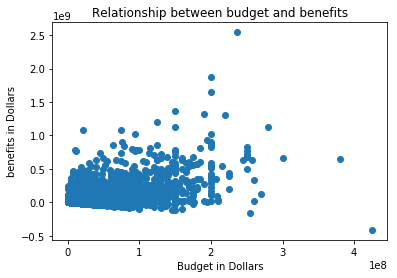

In [23]:
# X axis
plt.xlabel('Budget in Dollars')
# Y axis
plt.ylabel('benefits in Dollars')
# histogram title 
plt.title('Relationship between budget and benefits')
plt.scatter(df['budget'], df['benefits'], alpha=1)
plt.show()

We can see that there no relationship between budget and benefits.

 ### Research Question 1 (    3- Which movie had the highest and lowest revenue?)       

In [24]:
# highest revenue
df.loc[df['revenue'].idxmax()]

budget                                                    237000000
revenue                                                  2781505847
original_title                                               Avatar
cast              Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
runtime                                                         162
genres                     Action|Adventure|Fantasy|Science Fiction
release_date                                    2009-12-10 00:00:00
release_year                                                   2009
benefits                                                 2544505847
Name: 1386, dtype: object

In [25]:
# lowest revenue
df.loc[df['revenue'].idxmin()]

budget                                                      6000000
revenue                                                           2
original_title                                      Shattered Glass
cast              Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
runtime                                                          94
genres                                                Drama|History
release_date                                    2003-11-14 00:00:00
release_year                                                   2003
benefits                                                   -5999998
Name: 5067, dtype: object

Which movie had the highest and lowest revenue?

highest: Avatar with revenue of 2781505847$

lowest: Shattered Glass with revenue of 2$

>we will check if there a relation between the Revenue and benefits

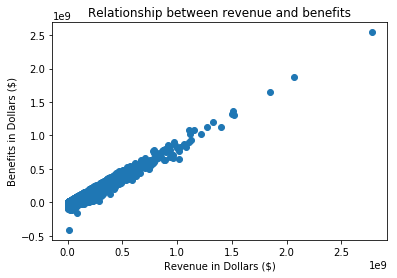

In [49]:
# X axis
plt.xlabel('Revenue in Dollars ($)')
# Y axis
plt.ylabel('Benefits in Dollars ($)')
# histogram title 
plt.title('Relationship between revenue and benefits')
plt.scatter(df['revenue'], df['benefits'], alpha=1)
plt.show()

now we have relationship between benefits and revenue, higher the revenue, higher the benefits.

 ### Research Question 1 ( 4- Which movie had the highest and least runtime?)                 

In [27]:
# the highest runtime
df.loc[df['runtime'].idxmax()]

budget                                                     18000000
revenue                                                      871279
original_title                                               Carlos
cast              Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...
runtime                                                         338
genres                                 Crime|Drama|Thriller|History
release_date                                    2010-05-19 00:00:00
release_year                                                   2010
benefits                                                  -17128721
Name: 2107, dtype: object

In [28]:
# the least runtime
df.loc[df['runtime'].idxmin()]

budget                                                           10
revenue                                                           5
original_title                                          Kid's Story
cast              Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
runtime                                                          15
genres                                    Science Fiction|Animation
release_date                                    2003-06-02 00:00:00
release_year                                                   2003
benefits                                                         -5
Name: 5162, dtype: object

Which movie had the highest and least runtime?

Greatest: Carlos with runtime of 338 minutes

Least: Kid's Story with runtime of 15 minutes

 ### Research Question 2 (    1-What is the average budget of the movie benefits of movies that genres is Comedy ?)       


now since in all the remaining question we are going to answer them with respect to benefits, we will now clean our datset and only include data of movies who benefits of movies that genres is Comedy.

In [29]:
# dataframe which have a data of movies which movies kind is Comedy.
df_data = df[df['genres'] == 'Comedy']
# Reindexing the dataframe
df_data.index = range(len(df_data))
#show the data
df_data.head()

,budget,revenue,original_title,cast,runtime,genres,release_date,release_year,benefits
0,68000000,215863606,Ted 2,Mark Wahlberg|Seth MacFarlane|Amanda Seyfried|...,115,Comedy,2015-06-25,2015,147863606
1,35000000,194564672,The Intern,Robert De Niro|Anne Hathaway|Rene Russo|Anders...,121,Comedy,2015-09-24,2015,159564672
2,35000000,140795793,Trainwreck,Amy Schumer|Bill Hader|Brie Larson|Colin Quinn...,125,Comedy,2015-07-17,2015,105795793
3,25000000,52395996,The Night Before,Joseph Gordon-Levitt|Seth Rogen|Anthony Mackie...,100,Comedy,2015-11-20,2015,27395996
4,50000000,240360392,Daddy's Home,Will Ferrell|Mark Wahlberg|Linda Cardellini|Th...,96,Comedy,2015-12-25,2015,190360392


In [30]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 9 columns):
budget            233 non-null int64
revenue           233 non-null int64
original_title    233 non-null object
cast              233 non-null object
runtime           233 non-null int64
genres            233 non-null object
release_date      233 non-null datetime64[ns]
release_year      233 non-null int64
benefits          233 non-null int64
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 16.5+ KB


In [31]:
#  the average budget of movies which movies kind is Comedy.
df_data['budget'].mean()

26438960.824034333

>What is the average budget of the movie benefits of movies that genres is Comedy?

> the average budget of the movies is 26438960.82$

 ### Research Question 2 (    2-What is the average revenue of the movie benefits of movies that genres is Comedy?)  

In [33]:
#  the average revenue of movies which movies kind is Comedy.
df_data['revenue'].mean()

78726851.9914163

>What is the average revenue of the movie benefits of movies that genres is Comedy?

> the average revenue of the movies is 78726851.99$

 ### Research Question 2 (    3-What is the average runtime of the movie benefits of movies that genres is Comedy?)  

In [34]:
#  the average runtime of movies which movies kind is Comedy.
df_data['runtime'].mean()

98.63519313304721

>What is the average runtime of the movie benefits of movies that genres is Comedy?

>So the average runtime of the movies is 98.63 Minutes



 ### Research Question 2 (    4-What is the classification of comedy films among all types of films?)  

In [37]:
# we will distribute the main data(generes) each kind and we will uss split to distribute it
genres_count = pd.Series(df['genres'].str.cat(sep = '|').split('|')).value_counts(ascending = False)
genres_count

Drama              1756
Comedy             1358
Thriller           1204
Action             1085
Adventure           749
Romance             667
Crime               651
Science Fiction     519
Horror              463
Family              425
Fantasy             396
Mystery             344
Animation           201
Music               136
History             129
War                 119
Western              52
Documentary          35
Foreign              13
TV Movie              1
dtype: int64

>What is the classification of comedy films among all types of films?

>so we now know the classification of Comedy is **Second** through the information from above

> **we can visualize this with a plot**

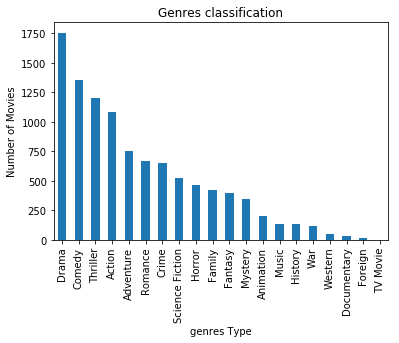

In [48]:
# Initialize the plot
diagram = genres_count.plot.bar(fontsize = 10)
# title
diagram.set(title = 'Genres classification')
# x label
# y label
diagram.set_xlabel('genres Type')
diagram.set_ylabel('Number of Movies')
# Show
plt.show()

now we can clearly see in the visualization the classification of movies.



<a id='conclusions'></a>
## Conclusions

> So in the conclusion, if we want to create movies which genres is Comedy then the:

> average budget of the movies can be arround 26438960.82$

> average revenue of the movies will be arround 78726851.99$

> average runtime of the movies can be arround 98.63 Minutes

> and the classification of Comedy is the second one which is good to make it.

> **NOTE:**
Also, do not depend on the success of the movie that comes with the (comedy) rating of 100% through the above analysis, but it may succeed




## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [50]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0